# The use of neural networks in semantic search (BERT, GPT)

## ML in NLP

### Embedding

- Embedding in machine learning refers to a representation learning technique that maps complex, high-dimensional data into a lower-dimensional vector space of numerical vectors.

#### Word embedding

- In natural language processing (NLP), words or concepts may be represented as numerical feature vectors, where similar concepts are mapped to nearby vectors.
- The primary goal of word embeddings is to represent words in a way that captures their semantic relationships and contextual information.
- Typically, the word representation is a real-valued vector that encodes the meaning of the word in such a way that the words that are closer in the vector space are expected to be similar in meaning.
    - These vectors are numerical representations in a continuous vector space, where the relative positions of vectors reflect the semantic similarities and relationships between words - distance and direction between vectors encode the degree of similarity.
- The reason vectors are used to represent words is that most machine learning algorithms, including neural networks, are incapable of processing plain text in its raw form, requiring numbers as input.
- The process of creating word embeddings involves training a model on a large corpus of text.
    - The corpus is preprocessed by tokenizing the text into words, removing stop words and punctuation and performing other text-cleaning tasks.
    - A sliding context window is applied to the text, and for each target word, the surrounding words within the window are considered as context words.

### Example

A simplified example of word embeddings for a very small corpus (6 words), where each word is represented as a 3-dimensional vector:
```
 cat    [0.2, -0.4, 0.7]
 dog    [0.6, 0.1, 0.5]
 apple  [0.8, -0.2, -0.3]
 orange [0.7, -0.1, -0.6]
 happy  [-0.5, 0.9, 0.2]
 sad    [0.4, -0.7, -0.5]
```
- For instance, the vectors for "cat" and "dog" are close together, reflecting their semantic relationship.
- Likewise, the vectors for "happy" and "sad" have opposite directions, indicating their contrasting meanings.

- Each value in an embedding vector is a specific dimension representing a specific characteristic of each word (or sentence for corresponding embeddings) within that dimension. For simplified understanding:
    - Dimension 1 might partly reflect something about gender (e.g., “king” vs. “queen”).
    - Dimension 2 might encode tense or morphological form.
    - Dimension 3 might reflect semantic domain (e.g., animals vs. tools).
- But in reality, the vectors rather encode semantic and syntactic features learned from patterns in the data.
- Individual words or sentences can be represented as points within an n-dimensional vector space.
    - Units that are close to each other in this space have similar values within their dimensions, and therefore similar values for the model.

    ![vector_space.png](https://raw.githubusercontent.com/UKPLab/sentence-transformers/master/docs/img/SemanticSearch.png)

### ML on the basis of word embeddings

There are two popular approaches to learning word embeddings:
1. The Word2Vec model, introduced by Tomas Mikolov and his colleagues at Google in 2013, marked a significant breakthrough.
    - Word2Vec leverages two models, Continuous Bag of Words (CBOW) and Continuous Skip-gram.
    - There techniques efficiently learn word embeddings from large corpora and have become widely adopted due to their simplicity and effectiveness.
2. GloVe (Global Vectors for Word Representation), introduced by Pennington et al. in 2014.
    - GloVe is based on the idea of using global statistics (word co-occurrence frequencies) to learn vector representations for words.
    - The method has been used in various NLP applications and is known for its ability to capture semantic relationships.

## References
- https://en.wikipedia.org/wiki/Embedding_(machine_learning)
- https://en.wikipedia.org/wiki/Word_embedding
- https://www.ibm.com/think/topics/word-embeddings
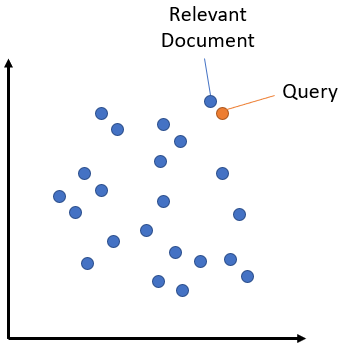

## SentenceTransformers (SBERT) library

### Summary

Sentence Transformers (a.k.a. SBERT) is the go-to Python module for accessing, using, and training state-of-the-art embedding and reranker models. It can be used to compute embeddings using Sentence Transformer models, to calculate similarity scores using Cross-Encoder (a.k.a. reranker) models, or to generate sparse embeddings using Sparse Encoder models (quickstart). This unlocks a wide range of applications, including semantic search, semantic textual similarity, and paraphrase mining.

### Semantic search

The idea behind semantic search is to embed all entries in your corpus, whether they be sentences, paragraphs, or documents, into a vector space. At search time, the query is embedded into the same vector space and the closest embeddings from your corpus are found.

- For symmetric semantic search your query and the entries in your corpus are of about the same length and have the same amount of content. In this case, you could potentially flip the query and the entries in your corpus.
- For asymmetric semantic search, you usually have a short query (like a question or some keywords) and you want to find a longer paragraph answering the query.

### Re-ranking

TODO

### References
- https://sbert.net

## Transformer architecture

### Summary

The transformer is a neural network architecture based on the multi-head attention mechanism, in which text is converted to numerical representations called tokens, and each token is converted into a vector via lookup from a word embedding table.

Transformers have the advantage of having no recurrent units, therefore requiring less training time than earlier recurrent neural architectures (RNNs) such as long short-term memory (LSTM)

Each of the above parts is a separate component of the architecture transformer.

### Attention mechanism

An attention mechanism is a ML technique that directs deep learning models to prioritize (or attend to) the most relevant parts of input data. Mathematically speaking, an attention mechanism computes attention weights that reflect the relative importance of each part of an input sequence to the task at hand.

1. A process of “reading” raw data sequences and converting them into vector embeddings, in which each element in the sequence is represented by its own feature vector(s).
2. A process of accurately determining similarities, correlations and other dependencies (or lack thereof) between each vector, quantified as alignment scores (or attention scores) that reflect how aligned (or not aligned) they are.
    - Alignment scores are then used to compute attention weights by using a softmax function, which normalizes all values to a range between 0–1 such that they all add up to a total of 1.
    - So for instance, assigning an attention weight of 0 to an element means it should be ignored. An attention weight of 1 means that element should receive 100% attention because all other elements would have attention weights of 0 (because all weights must sum up to 1).
    - In essence, the output of a softmax function is a probability distribution.
3. A process of using those attention weights to emphasize or deemphasize the influence of specific input elements on how the model makes predictions. In other words, a means of using attention weights to help models focus on or ignore information.

### Queries, keys and values

The seminal “Attention is All You Need” paper articulated its attention mechanism by using the terminology of a relational database: queries, keys and values:

- The query vector represents the information a given token is seeking.
- The key vectors represent the information that each token contains. Alignment between query and key is used to compute attention weights.
- The value (or value vector) applies the attention-weighted information from the key vectors. Contributions from keys that are strongly aligned with a query are weighted more heavily; contributions from keys that are not relevant to a query will be weighted closer to zero.

Therefore, each vector is calculated as follows using embedding of each token:

- The embedding is multiplied by the weight matrix $W_q$ to yield the query vector $Q$
- The embedding is multiplied by the weight matrix $W_k$ to yield the key vector $K$
- The embedding is multiplied by the weight matrix $W_v$ to yield the value vector $V$

### Self-attention

The earliest types of attention mechanisms all performed what is now categorized as cross-attention. In cross-attention, queries and keys come from different data sources. In self-attention, queries, keys and values are all drawn from the same source.

Consider a language model interpreting the English text `on Friday, the judge issued a sentence`:

- The preceding word `the` suggests that `judge` is acting as a noun as in, person presiding over a legal trial rather than a verb meaning to appraise or form an opinion.
- That context for the word `judge` suggests that `sentence` probably refers to a legal penalty, rather than a grammatical “sentence.”
- The word `issued` further implies that sentence is referring to the legal concept, not the grammatical concept.
- Therefore, when interpreting the word `sentence`, the model should pay close attention to `judge` and `issued`. It should also pay some attention to the word `the`. It can more or less ignore the other words. A well-trained self-attention mechanism would compute attention weights accordingly.

The attention mechanism’s primary function is to weight the importance of the query-key pairings between each token. For each token x in an input sequence, the transformer model computes (and then applies) attention weights as follows:

1. Token x’s query vector $Q_x$ is multiplied by each other token’s key vector $K$.
    - The resulting dot product will be large for a token that’s highly relevant; its dot product with an irrelevant token will be small or negative.
2. Each dot product will be scaled - that is, multiplied—by $\frac{1}{\sqrt{d_k}}$.
    - The result is the alignment score between token x and each other token.
3. These alignment scores are input to a softmax function, which normalizes each score to a value between 0–1, such that they all add up to 1.
    - These are the attention weights between token x and each other token.
    - You can think of each token as now having a corresponding vector of attention weights, in which each element of that vector represents the extent to which some other token should influence it.
4. Each other token’s value vector is now multiplied by its respective attention weight.
5. These attention-weighted value vectors are all averaged together.
    - The resulting vector represents the average of all the attention-weighted contributions from each key vector.
6. Finally, the resulting vector of changes for each token is added to token x’s original vector embedding.
    - In essence, token x’s vector embedding has been updated to better reflect the context provided by the other tokens in the sequence.

### Multihead attention



### References

- https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture)
- https://www.ibm.com/think/topics/attention-mechanism

### Bi-Encoder (e.g., BERT, RoBERTa)

Bi-encoders independently encode two inputs (like a query and a document) into fixed-dimensional dense vectors using the same transformer model or encoder (with shared weights).
Then it compares those embeddings - usually with cosine similarity or dot product. This type is often used for semantic search, information retrieval or re-ranking.

**Pros**
- Very fast at inference (because you can precompute document vectors).
- Scales well for large retrieval (e.g., millions of docs).

**Cons**
- Because the texts are encoded separately, it can’t model deep interactions between words in query and document.
- Less accurate than cross-encoders for fine-grained tasks.

### Cross-Encoder

Cross-encoders concatenate the two inputs into a single sequence and process them jointly in one pass through a transformer. This allows the model to attend to all tokens across both inputs simultaneously, capturing fine-grained interactions between them.

**Pros**
- Very accurate - because it captures cross-token attention between query and document.
- Great for fine-grained tasks like ranking or classification.

**Cons**
- Slow and expensive - you must recompute the score for each pair.
- Not scalable to millions of documents.

### Decoder (e.g., GPT, Claude)

Decoders are typically part of encoder-decoder architectures used in tasks like text generation. While bi- and cross-encoders focus on encoding inputs into vectors for similarity or classification, decoders generate output sequences based on the encoded input representations. So, decoders help transform encoded vectors back into meaningful text or other formats, which is particularly useful for generative models.

### Encoder-Decoder (e.g., T5, BART)

An encoder-decoder first encodes an input sequence into a fixed-length vector representation, which is then passed to a decoder to generate an output sequence. This architecture is commonly used for tasks like machine translation, text summarization, and image captioning.

### Basic usage of an embedding model

#### Semantic Textual Similarity (STS)

Produce embeddings for all texts involved and calculate the cosine-similarity between them. The text pairs with the highest similarity score are most semantically similar.

In [15]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

# 2. Calculate embeddings
embeddings = model.encode(sentences)
print(embeddings.shape)  # [3, 384]

# 3. Calculate the embedding similarities
# compare each sentence A with each sentence B
# 1 with 1,   1 with 2,   1 with 3
# 2 with 1,   2 with 2,   ...
# ...
similarities = model.similarity(embeddings, embeddings)
print(similarities)

2025-11-18 20:09:40,321 - INFO - Use pytorch device_name: cuda:0
2025-11-18 20:09:40,322 - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(3, 384)
tensor([[1.0000, 0.6660, 0.1046],
        [0.6660, 1.0000, 0.1411],
        [0.1046, 0.1411, 1.0000]])


### Manual implementation (top 5 matches)

For small corpora (up to about 1 million entries), we can perform semantic search with a manual implementation by computing the embeddings for the corpus with `SentenceTransformer.encode_document` as well as for our query with `SentenceTransformer.encode_query`, and then calculating the semantic textual similarity using `SentenceTransformer.similarity`.

https://sbert.net/examples/sentence_transformer/applications/semantic-search/README.html

In [16]:
import torch

from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Corpus with example documents
corpus = [
    "Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed.",
    "Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning.",
    "Neural networks are computing systems vaguely inspired by the biological neural networks that constitute animal brains.",
    "Mars rovers are robotic vehicles designed to travel on the surface of Mars to collect data and perform experiments.",
    "The James Webb Space Telescope is the largest optical telescope in space, designed to conduct infrared astronomy.",
    "SpaceX's Starship is designed to be a fully reusable transportation system capable of carrying humans to Mars and beyond.",
    "Global warming is the long-term heating of Earth's climate system observed since the pre-industrial period due to human activities.",
    "Renewable energy sources include solar, wind, hydro, and geothermal power that naturally replenish over time.",
    "Carbon capture technologies aim to collect CO2 emissions before they enter the atmosphere and store them underground.",
]
# Use "convert_to_tensor=True" to keep the tensors on GPU (if available)
corpus_embeddings = embedder.encode_document(corpus, convert_to_tensor=True)

# Query sentences:
queries = [
    "How do artificial neural networks work?",
    "What technology is used for modern space exploration?",
    "How can we address climate change challenges?",
]

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode_query(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    similarity_scores = embedder.similarity(query_embedding, corpus_embeddings)[0]
    scores, indices = torch.topk(similarity_scores, k=top_k)

    print("\nQuery:", query)
    print("Top 5 most similar sentences in corpus:")

    for score, idx in zip(scores, indices):
        print(f"(Score: {score:.4f})", corpus[idx])

2025-11-18 20:09:42,843 - INFO - Use pytorch device_name: cuda:0
2025-11-18 20:09:42,843 - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Query: How do artificial neural networks work?
Top 5 most similar sentences in corpus:
(Score: 0.5926) Neural networks are computing systems vaguely inspired by the biological neural networks that constitute animal brains.
(Score: 0.5288) Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning.
(Score: 0.4647) Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed.
(Score: 0.1381) Mars rovers are robotic vehicles designed to travel on the surface of Mars to collect data and perform experiments.
(Score: 0.0912) Carbon capture technologies aim to collect CO2 emissions before they enter the atmosphere and store them underground.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Query: What technology is used for modern space exploration?
Top 5 most similar sentences in corpus:
(Score: 0.3754) Mars rovers are robotic vehicles designed to travel on the surface of Mars to collect data and perform experiments.
(Score: 0.3669) SpaceX's Starship is designed to be a fully reusable transportation system capable of carrying humans to Mars and beyond.
(Score: 0.3452) The James Webb Space Telescope is the largest optical telescope in space, designed to conduct infrared astronomy.
(Score: 0.2625) Renewable energy sources include solar, wind, hydro, and geothermal power that naturally replenish over time.
(Score: 0.2275) Carbon capture technologies aim to collect CO2 emissions before they enter the atmosphere and store them underground.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Query: How can we address climate change challenges?
Top 5 most similar sentences in corpus:
(Score: 0.3760) Global warming is the long-term heating of Earth's climate system observed since the pre-industrial period due to human activities.
(Score: 0.3144) Carbon capture technologies aim to collect CO2 emissions before they enter the atmosphere and store them underground.
(Score: 0.2948) Renewable energy sources include solar, wind, hydro, and geothermal power that naturally replenish over time.
(Score: 0.0420) Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed.
(Score: 0.0411) Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning.


### Optimized implementation (`util.semantic_search`)

In [17]:
import sentence_transformers.util as util

from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

corpus = [
    "Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed.",
    "Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning.",
    "Neural networks are computing systems vaguely inspired by the biological neural networks that constitute animal brains.",
    "Mars rovers are robotic vehicles designed to travel on the surface of Mars to collect data and perform experiments.",
    "The James Webb Space Telescope is the largest optical telescope in space, designed to conduct infrared astronomy.",
    "SpaceX's Starship is designed to be a fully reusable transportation system capable of carrying humans to Mars and beyond.",
    "Global warming is the long-term heating of Earth's climate system observed since the pre-industrial period due to human activities.",
    "Renewable energy sources include solar, wind, hydro, and geothermal power that naturally replenish over time.",
    "Carbon capture technologies aim to collect CO2 emissions before they enter the atmosphere and store them underground.",
]
corpus_embeddings = embedder.encode_document(corpus, convert_to_tensor=True)

queries = [
    "How do artificial neural networks work?",
    "What technology is used for modern space exploration?",
    "How can we address climate change challenges?",
]

top_k = min(5, len(corpus))

query_embeddings = embedder.encode_query(queries, convert_to_tensor=True)
results = util.semantic_search(query_embeddings, corpus_embeddings, top_k=top_k)

print(f"Top {top_k} most similar sentences in corpus for each query:")
for q, qr in zip(queries, results):
    print("\nQuery:", q)

    for r in qr:
        score = r["score"]
        idx = r["corpus_id"]
        print(f"(Score: {score:.4f})", corpus[idx])

2025-11-18 20:09:44,949 - INFO - Use pytorch device_name: cuda:0
2025-11-18 20:09:44,950 - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Top 5 most similar sentences in corpus for each query:

Query: How do artificial neural networks work?
(Score: 0.5926) Neural networks are computing systems vaguely inspired by the biological neural networks that constitute animal brains.
(Score: 0.5288) Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning.
(Score: 0.4647) Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed.
(Score: 0.1381) Mars rovers are robotic vehicles designed to travel on the surface of Mars to collect data and perform experiments.
(Score: 0.0912) Carbon capture technologies aim to collect CO2 emissions before they enter the atmosphere and store them underground.

Query: What technology is used for modern space exploration?
(Score: 0.3754) Mars rovers are robotic vehicles designed to travel on the surface of Mars to collect data and perform experiments.
(Score: 0.3669) S

## Semantic search over PDF

- https://github.com/explosion/spacy-layout
- https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [18]:
# %python -m spacy download en_core_web_trf

In [19]:
import spacy
from spacy_layout import spaCyLayout

# Read PDF
nlp = spacy.load("en_core_web_trf")

layout = spaCyLayout(nlp)

# Process a document and create a spaCy Doc object
# There is also a possibility to process several files with `layout.pipe(paths)`
doc = layout("../semantic_search/Attention Is All You Need.pdf")

# Filter spans for body text
text_spans = [
    span.text.strip() for span in doc.spans.get("layout", [])
    if span.label_ == "text"
]

text = " ".join(text_spans)

doc = nlp(text)
sentences = [s.text.strip() for s in doc.sents if s.text.strip()]
print("Total sentences:", len(sentences))

# Embed the sentences
pdf_embedder = SentenceTransformer("all-MiniLM-L12-v2", device="cuda")

pdf_embeddings = pdf_embedder.encode_document(sentences, convert_to_tensor=True)
pdf_embeddings = util.normalize_embeddings(pdf_embeddings)

2025-11-18 20:09:48,492 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-11-18 20:09:48,498 - INFO - Going to convert document batch...
2025-11-18 20:09:48,499 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 44ae89a68fc272bc7889292e9b5a1bad
2025-11-18 20:09:48,502 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-11-18 20:09:48,503 - INFO - easyocr cannot be used because it is not installed.
2025-11-18 20:09:48,504 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-11-18 20:09:48,521 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-11-18 20:09:48,532 [RapidOCR] download_file.py:60: File exists and is valid: E:\Work\TNTU\PhD\subjects\AI\AI-fundamentals\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2025-11-18 20:09:48,533 [RapidOCR] torch.py:54: Using E:\Work\TNTU\PhD\subjects\AI\AI-fundamentals\.venv\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.pth
[INFO] 2025-11-18 20:09:48,659 

Total sentences: 177


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
# Semantic search
queries = ["accuracy"]

top_k = min(5, len(corpus))

pdf_query_embeddings = pdf_embedder.encode_query(queries, convert_to_tensor=True)

pdf_query_embeddings = pdf_query_embeddings.to("cuda")
pdf_query_embeddings = util.normalize_embeddings(pdf_query_embeddings)

results = util.semantic_search(pdf_query_embeddings, pdf_embeddings, top_k=top_k)

print(f"Top {top_k} most similar sentences in corpus for each query:")
for q, qr in zip(queries, results):
    print("\nQuery:", q)

    for r in qr:
        score = r["score"]
        idx = r["corpus_id"]
        print(f"(Score: {score:.4f})", sentences[idx])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Top 5 most similar sentences in corpus for each query:

Query: accuracy
(Score: 0.4139) This hurts perplexity, as the model learns to be more unsure, but improves accuracy and BLEU score.
(Score: 0.3691) We estimate the number of floating point operations used to train a model by multiplying the training time, the number of GPUs used, and an estimate of the sustained single-precision floating-point capacity of each GPU 5 .
(Score: 0.3497) During training, we employed label smoothing of value ϵ ls = 0 . 1 [36].
(Score: 0.3126) Acknowledgements
(Score: 0.3122) We trained a 4-layer transformer with d model = 1024 on the Wall Street Journal (WSJ) portion of the Penn Treebank [25], about 40K training sentences.
